In [447]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image

# Question 1: Unit Norm Ball

In [448]:
def norm(vecs,p):
  norm=np.sum(np.abs(vecs)**p,axis=0)**(1/p)
  return norm

In [449]:
def createlinearspace():
 x = np.random.uniform(-1, 1, 10000)
 y = np.random.uniform(-1, 1, 10000)
 return [x,y]  

In [450]:
def plotvectorspaceandnormaball(vectors,unit_vector_norm,convexity):
  plt.scatter(vectors[0],vectors[1],label='vector_space',color='orange')
  if convexity:
     plt.plot(unit_vector_norm[0],unit_vector_norm[1],label='norm_ball',linestyle='dashed',color='blue')
  else:     
     plt.scatter(unit_vector_norm[0],unit_vector_norm[1],color='blue',label='norm_ball')
   
  plt.legend(loc='best')
  plt.show()

In [451]:
def plotunitnormball(p,convexity=False):
  vectors=createlinearspace()
  vector_norm=norm(vectors,p)
  unit_vector_norm=vectors/vector_norm
  plotvectorspaceandnormaball(vectors,unit_vector_norm,convexity)

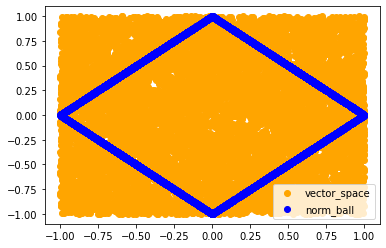

In [452]:
plotunitnormball(1)

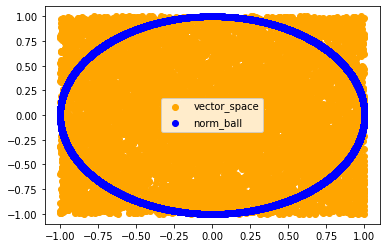

In [453]:
plotunitnormball(2)

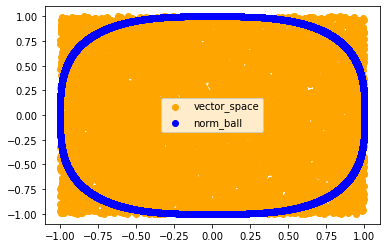

In [454]:
plotunitnormball(3)

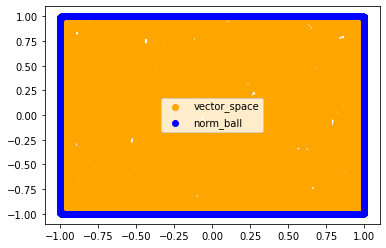

In [455]:
plotunitnormball(100)

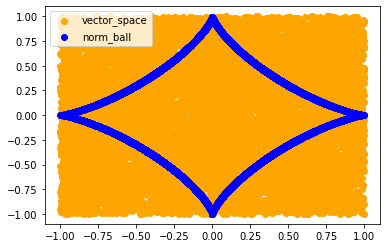

In [456]:
plotunitnormball(0.75)

As we can see for 1<=p<=3 the unit norm balls are convex whereas for 0<p<1 the unit norm balls are not convex that can been seen from figure below i.e. when we connect two points within the shape and the line goes outside then the shape is not convex. Also for p>=1 all the unit norm balls are convex as plotted above

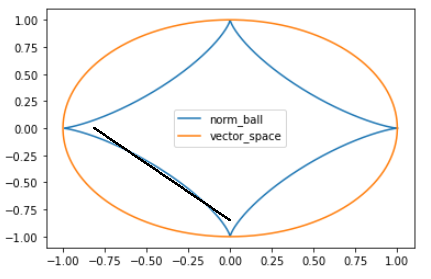

These plot function draws dashed lines between the points in the unit norm ball. It is very clear from the figures that for p=1
The norm ball is convex as no dashed line can be seen outside the space.
And it is true for p>=1

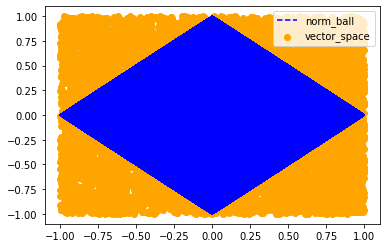

In [457]:
plotunitnormball(1,True)

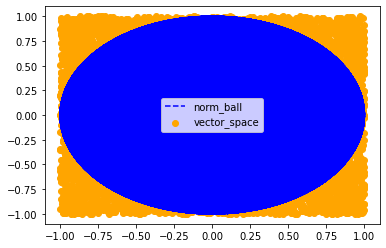

In [458]:
plotunitnormball(2,True)

But for 0<p<1 the dashed lines can be seen outside the unit norm ball i.e. there are points in the set from which when we draw a line the points in the line lies outside that unit norm ball hence making it a non-convex function in that range

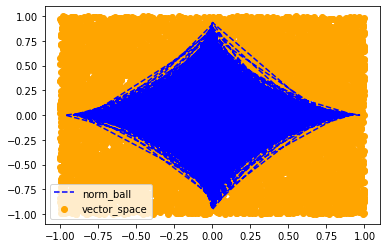

In [459]:
plotunitnormball(0.5,True)

# Question 2: Completeness under metric space

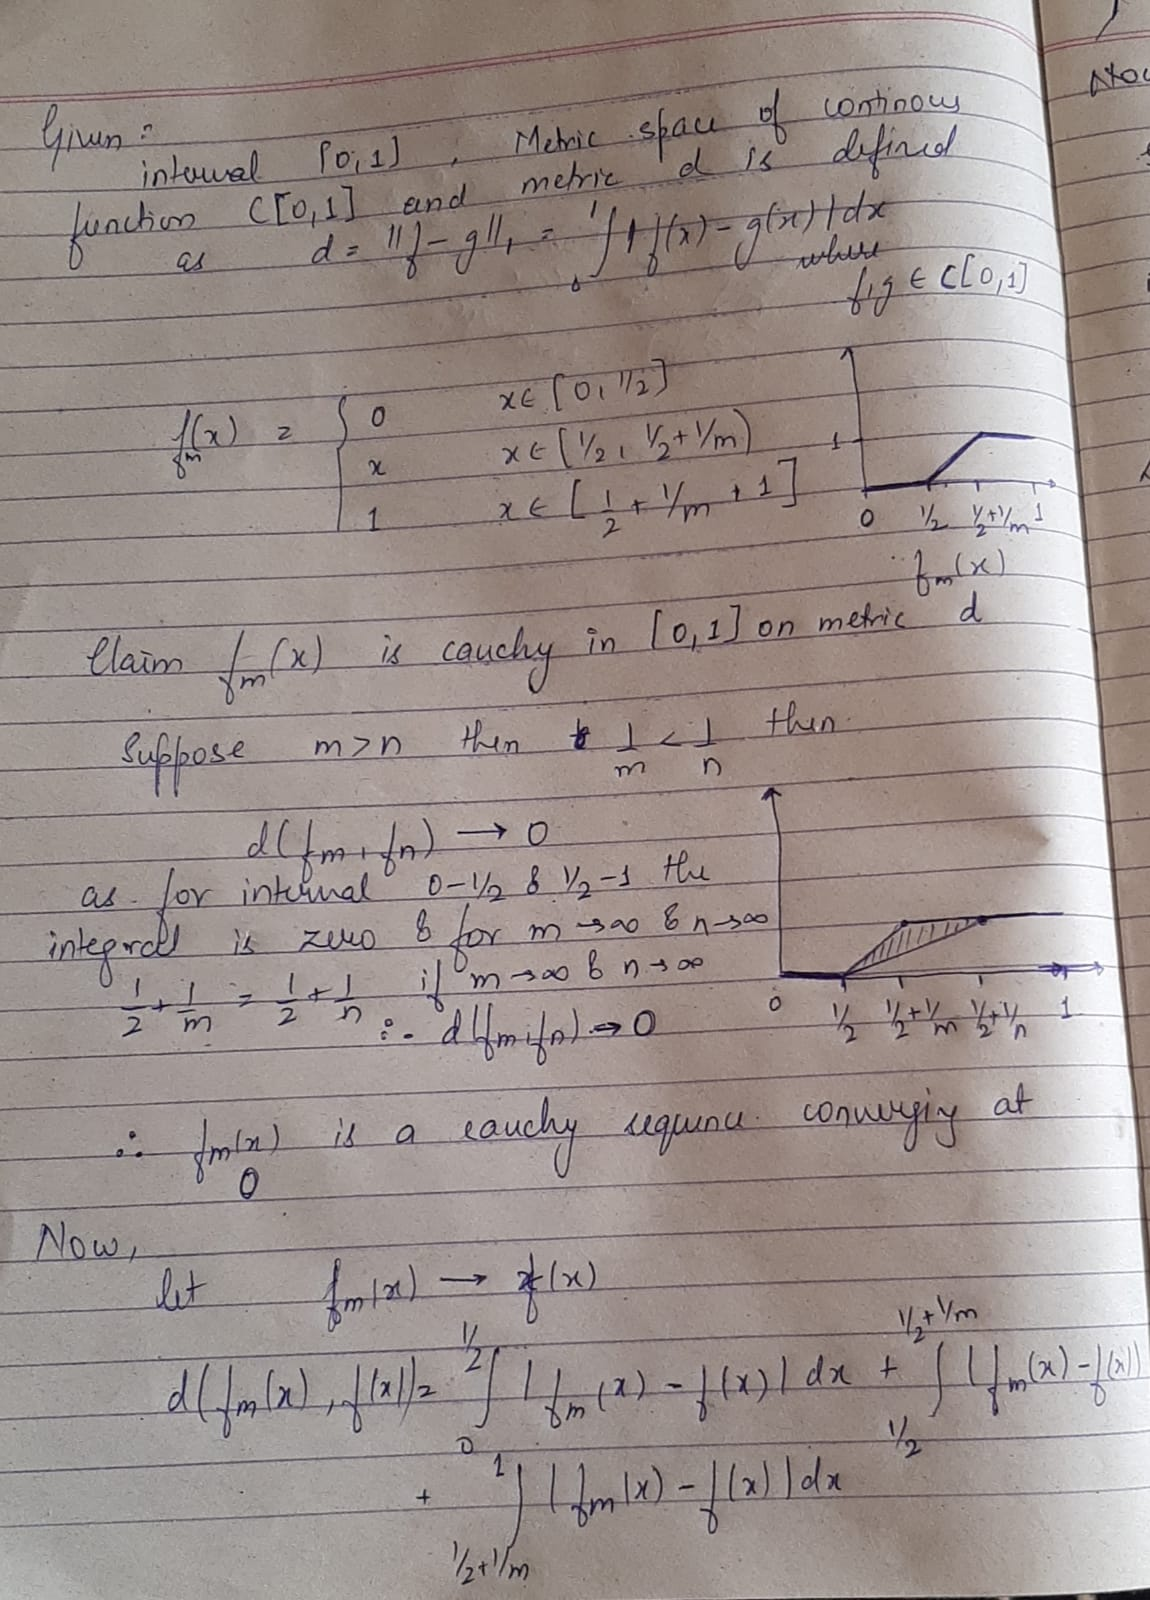

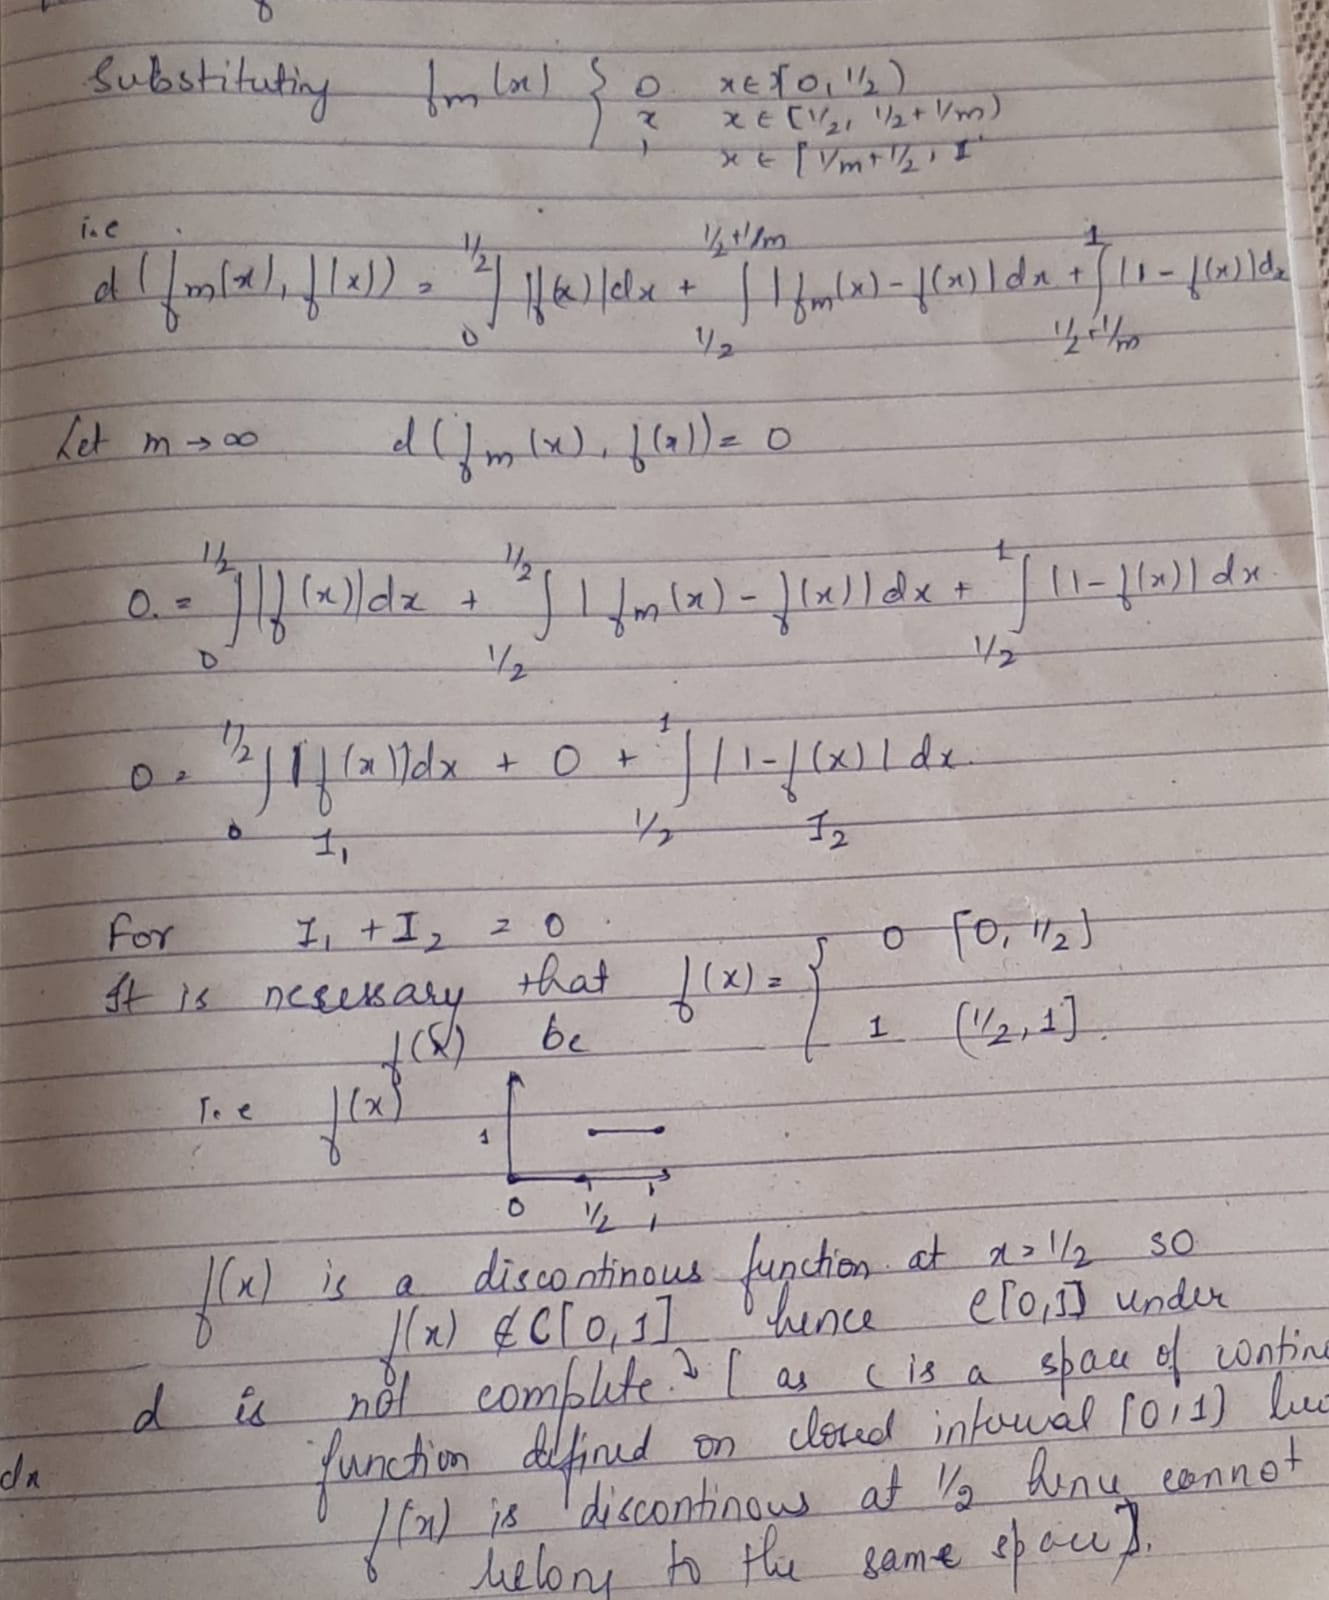

In [460]:
def f(x,m):
   if x>=0.0 and x<0.5:
     return 0.0
   elif x>=0.5 and x<(0.5+ (1/m)):
     return x
   elif x>=(0.5+(1/m)) and x<=1:
     return 1.0
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]     
x1 =[0,0.1,0.2,0.3,0.4,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.7,0.8,0.9,1]
ym=list()
yn=list()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]


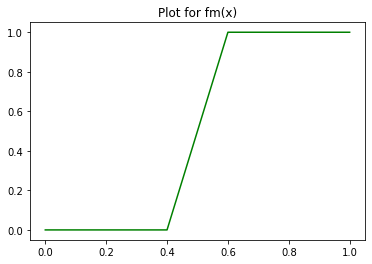

In [461]:
for i in x:
  ym.append(f(i,10))
print(ym)  
plt.plot(x, ym, color='green')
plt.title('Plot for fm(x)')
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 1.0, 1.0, 1.0, 1.0, 1.0]


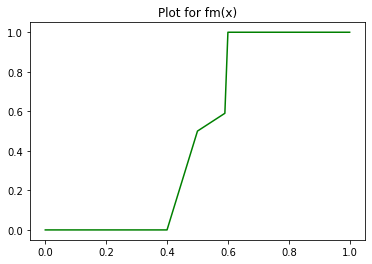

In [462]:
ym.clear()
for i in x1:
  ym.append(f(i,10))
print(ym)  
plt.plot(x1, ym, color='green')
plt.title('Plot for fm(x)')
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 1.0, 1.0, 1.0, 1.0, 1.0]


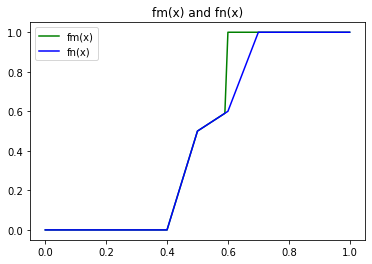

In [463]:
ym.clear()
for i in x1:
  ym.append(f(i,10))
  yn.append(f(i,8))
print(ym)  
plt.plot(x1, ym, color='green',label='fm(x)')
plt.plot(x1, yn, color='blue',label='fn(x)')
plt.title('fm(x) and fn(x)')
plt.legend(loc='best')
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


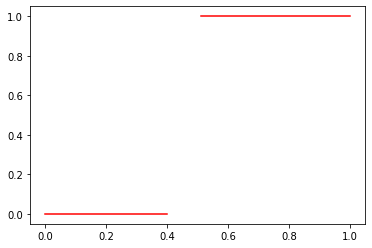

In [464]:
ym.clear()
for i in x1:
  ym.append(f(i,np.inf))
print(ym)  
x1[5]=np.nan
ym[5]=np.nan  
plt.plot(x1, ym, color='red')
plt.show()

As in the plot we can see the function becomes discontinous when m->infinity 
the y array i.e. function values shows that in case 2 the function only takes up two values 0 and 1 and hence and is discontinous at 0.5 thus to show it is discontinous graphically nan are inserted

# Question 3:PMF,Entropy

## 3a

In [465]:
def ComputeEntropy(pmf):
  entropy=0
  for i in range(len(pmf)):
    if pmf[i]!=0:
      entropy+=-(pmf[i]*np.log2(pmf[i]))
  return entropy    


In [466]:
pmf=[0.5,0.25,0.25,0]
entropy=ComputeEntropy(pmf)
print("Entropy in bits="+str(entropy))

Entropy in bits=1.5


## 3b 

In [467]:
def CreateBernoullipmf(p):
  return [p,1-p]

Text(0, 0.5, 'Entropy in bits')

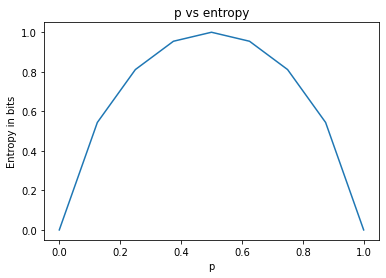

In [468]:
p_values=np.linspace(0,1,9)
entropy=list()
for i in p_values:
  pmf=CreateBernoullipmf(i)
  entropy.append(ComputeEntropy(pmf))
plt.plot(p_values,entropy)  
plt.title("p vs entropy")
plt.xlabel("p")
plt.ylabel("Entropy in bits")

Entropy attains maxima(1) at p=0.5 i.e when both the classes are equi-probable i.e. the randomness is more since the probability of attaining any value is same. Entropy of a baised coin will be less than the entropy of fair coin. Again because of the fact that in baised coin event the randomness is less as the coin will give an output with some bais on the contarary fair coin toss is unbaised i.e. coin can take any value with equal probability

# Question 4: Histogram, Entropy of Gray scale Images

Question 4

In [469]:
def ReadImage(imagename):
 image = Image.open(imagename)
 image_data=np.array(image)
 return image,image_data

Note:This function works on images with only one channel

In [470]:
def FindHistogram(image_data,h,w):
  hist_dic={}
  hist_dic=InitializeDictForGrayScale()
  for i in range(h):
    for j in range(w):
      pixel_value=image_data[i][j]
      hist_dic[pixel_value]=hist_dic[pixel_value]+1
  return hist_dic 

In [471]:
def NormalizeHistogram(hist,n_pixels):
     if n_pixels==0:
       return hist
     for i in hist:
       hist[i]=hist[i]/n_pixels
     return hist  

In [472]:
def InitializeDictForGrayScale():
  histogram_dict={}
  pixel_values=np.linspace(0,255,256)
  pixel_values=[int(x) for x in pixel_values]
  histogram_dict = {pixel_value: 0 for pixel_value in pixel_values}
  return histogram_dict

In [473]:
def PlotHistogram(hist_dic):
    plt.bar(hist_dic.keys(),hist_dic.values(),color='b',label='normalized_image_histogram')

## 4a

In [474]:
def GetNormalizedHistogram(image_data,h,w):
    hist=FindHistogram(image_data,h,w)
    norm_hist=NormalizeHistogram(hist,h*w)
    return norm_hist

## 4b

In [475]:
def PlotNormalizedHistogramComputeEntropy(imgData,h,w):
    norm_hist=GetNormalizedHistogram(imgData,h,w)
    PlotHistogram(norm_hist)
    entropy=ComputeEntropy(list(norm_hist.values()))
    print("Entropy in bits")
    print(entropy)

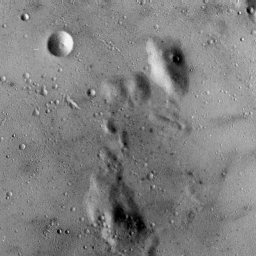

In [476]:
image,ImgData=ReadImage('5.1.09.tiff')
h,w=image.size
image

Entropy in bits
6.709312335966639


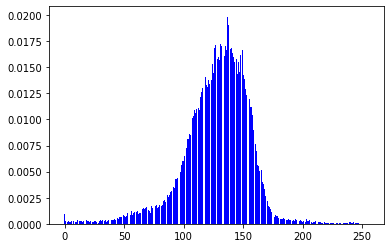

In [477]:
PlotNormalizedHistogramComputeEntropy(ImgData,h,w)

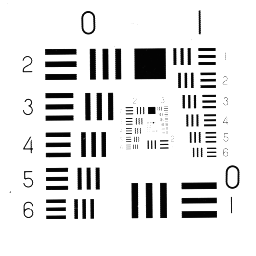

In [478]:
image,ImgData=ReadImage('5.1.13.tiff')
h,w=image.size
image


Entropy in bits
1.5483136966538102


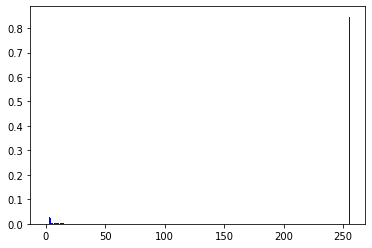

In [479]:
PlotNormalizedHistogramComputeEntropy(ImgData,h,w)

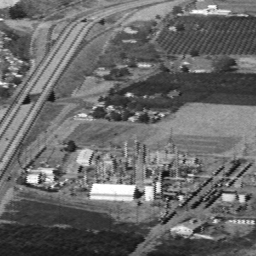

In [480]:
image,ImgData=ReadImage('5.1.14.tiff')
h,w=image.size
image


Entropy in bits
7.342432512894013


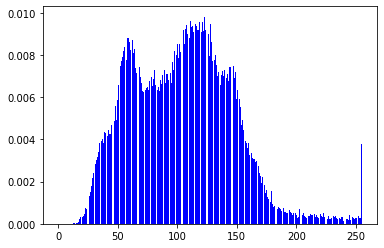

In [481]:
PlotNormalizedHistogramComputeEntropy(ImgData,h,w)

## 4c



By observing the histogram and entropy values following observations can be made

*   The histogram shows the distribution of pixel values within an image. i.e. which pixel value is pre-dominant and which is not

*   The entropy values tells about how many different pixel values are taken by the image i.e. what is the randomness associated with the image pixel values.

*   For example: The histogram of '5.1.13.tiff' shows that the image takes values only near to 0 or 255 nowhere in the middle that can be seen in the image as well. Image is more of a black and white image. Whereas in '5.1.14.tiff' the image is an aerial image that involves different objects with different pixel values and the histogram shows that the pixel values are more distributed.

*   In '5.1.13.tiff' we can also see the entropy value is less i.e. 1.5 since the image includes less random pixel values compared to 7.3 for '5.1.14.tiff' where the pixel values are more random.


We can estimate the distribution of pixel values and randomness of the image by looking at the histogram or entropy values of an image













# Question 5 : Joint PMF and Joint Entropy

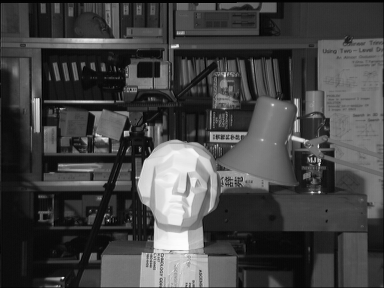

In [482]:
leftimage,leftImgData=ReadImage('left.png')
h,w=leftimage.size
leftimage

In [483]:
leftImgData

array([[ 1,  3,  3, ...,  2,  3,  1],
       [ 3,  6,  4, ...,  3,  4,  3],
       [ 3,  5,  4, ..., 22, 24, 12],
       ...,
       [28, 14, 10, ..., 67, 71, 36],
       [32, 15, 11, ..., 76, 81, 42],
       [18,  7,  5, ..., 38, 43, 22]], dtype=uint8)

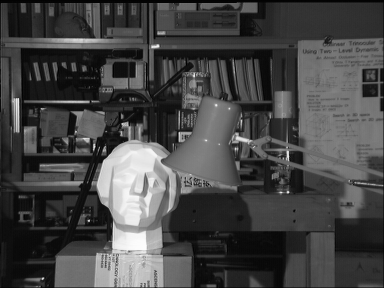

In [484]:
rightimage,rightImgData=ReadImage('right.png')
h,w=rightimage.size
rightimage

In [485]:
rightImgData

array([[ 1,  3,  3, ...,  2,  3,  1],
       [ 3,  6,  4, ...,  3,  4,  3],
       [ 3,  4,  4, ..., 23, 23, 11],
       ...,
       [28, 16, 13, ..., 67, 67, 33],
       [32, 16, 11, ..., 81, 79, 39],
       [17,  8,  7, ..., 45, 44, 22]], dtype=uint8)

In [486]:
def ComputeJointHistogram(imgdata1,imgdata2,h,w):
  joint_hist_dict={}
  for i in range(w):
   for j in range(h):
    x=imgdata1[i][j]
    y=imgdata2[i][j]
    key=str(x)+"_"+str(y)
    if key in joint_hist_dict:
      joint_hist_dict[key]=joint_hist_dict[key]+1
    else:
      joint_hist_dict[key]=1
  return  joint_hist_dict  

In [487]:
def Getxyzfor3dplot(normalized_joint_hist):
 x=list()
 y=list()
 z=list()
 for i in normalized_joint_hist.keys():
  key=i.split("_")
  x.append(int(key[0]))
  y.append(int(key[1]))
  z.append(normalized_joint_hist[i])
 return x,y,z 

In [488]:
def Plot3dHistogram(x,y,z) :
 figure = plt.figure()
 axes = plt.axes(projection ="3d")
 zpos=np.zeros(len(x))
 dx=dy=np.ones(len(x))
 axes.bar3d(x, y, zpos, dx, dy, z, shade=True)
 axes.set_title('Joint Histogram Plot')
 axes.set_xlabel("Pixel Value in 1")
 axes.set_ylabel("Pixel Value in 2")
 axes.set_zlabel("Pair_Frequency")
 plt.show()

## 5a

In [489]:
def ComputeandPlotJointHistogram(imagepath1,imagepath2):
   image,ImgData1=ReadImage(imagepath1)
   h,w=image.size
   image,ImgData2=ReadImage(imagepath2)
   joint_hist=ComputeJointHistogram(ImgData1,ImgData2,h,w)
   normalized_joint_hist=NormalizeHistogram(joint_hist.copy(),h*w)
   x,y,z=Getxyzfor3dplot(normalized_joint_hist)
   Plot3dHistogram(x,y,z)
   return normalized_joint_hist   

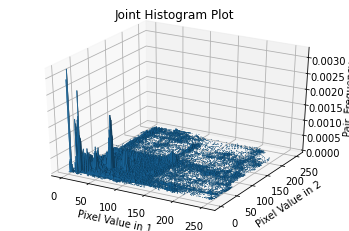

In [490]:
 normalized_joint_hist=ComputeandPlotJointHistogram('left.png','right.png')

## 5b

In [491]:
def GetJointPMF(normalized_joint_hist):
  rows= cols = 256
  pmf_matrix = [([0]*cols) for i in range(rows)]
  for i in normalized_joint_hist.keys():
    key=i.split('_')
    i_index=int(key[0])
    j_index=int(key[1])
    pmf_matrix[i_index][j_index]=normalized_joint_hist[i]
  return pmf_matrix  

In [492]:
def CalulateJointEntropy(joint_pmf):
  joint_entropy=0
  rows,cols=np.shape(joint_pmf)
  for i in range(rows):
    for j in range(cols):
      if joint_pmf[i][j]!=0:
       joint_entropy+=-(joint_pmf[i][j]*np.log2(joint_pmf[i][j]))
  return joint_entropy     

## 5c

In [493]:
joint_pmf=GetJointPMF(normalized_joint_hist)
joint_entropy=CalulateJointEntropy(joint_pmf)
print("Joint Entropy in bits="+str(joint_entropy))

Joint Entropy in bits=13.675203263376206


Same joint probability can also be computed using compute entropy function by directly passing dictionary values since the probability values here in this dictionary is itself joint probability values

In [494]:
joint_entropy=ComputeEntropy(list(normalized_joint_hist.values()))
print("Joint Entropy in bits="+str(joint_entropy))

Joint Entropy in bits=13.675203263374575


# Question 6 : Conditional PMF and entropy

 *Note:
index 0 = H(Y/X)
index 1 =H(X/Y)*


## 6a

In [495]:
def getconditionalpmffromjointpmf(joint_pmf,index,value):
   if index==0:
     joint_p=joint_pmf[value][:]
   else:
     joint_p=joint_pmf[:][value]  
   prob=  np.sum(joint_p)
   if prob!=0:
      conditional_pmf=joint_p/prob
   else:
      conditional_pmf=np.zeros(len(joint_p)) 
   return conditional_pmf

In [496]:
def getcompleteconditionalpmffromjointpmf(joint_pmf,index):
  conditional_pmf=list()
  rows=len(joint_pmf)
  for value in range(rows):
     conditional_p=getconditionalpmffromjointpmf(joint_pmf,index,value)
     conditional_pmf.append(conditional_p) 
  return np.array(conditional_pmf)

## 6b

In [497]:
def CalculateConditionalEntropy(joint_pmf,index):
  conditional_entropy=0
  rows,cols=np.shape(joint_pmf)
  if index==1:
    joint_pmf=np.transpose(joint_pmf)
  conditional_pmf=getcompleteconditionalpmffromjointpmf(joint_pmf,index)  
  for i in range(rows):
    for j in range(cols):
      if joint_pmf[i][j]!=0 and conditional_pmf[i][j]!=0:
       conditional_entropy+=-(joint_pmf[i][j]*np.log2(conditional_pmf[i][j]))
  if index==1:
    joint_pmf=np.transpose(joint_pmf)     
  return conditional_entropy   

## 6c

*Note: joint_pmf is calculated in 5c

index 0 = H(Y/X)
index 1 =H(X/Y)

X=left.png
Y=right.png *

In [507]:
conditional_entropy=CalculateConditionalEntropy(joint_pmf,1)
print("Conditional Entropy H(X/Y) in bits="+str(conditional_entropy))

Conditional Entropy H(X/Y) in bits=6.396577731686122


In [508]:
conditional_entropy=CalculateConditionalEntropy(joint_pmf,0)
print("Conditional Entropy H(Y/X) in bits="+str(conditional_entropy))

Conditional Entropy H(Y/X) in bits=6.416909158632463


# Question 7 : KL-Divergence

## 7a

In [499]:
def CalculateKLDivergence(prob_dist1,prob_dist2):
  d_KL=0
  for i in range(len(prob_dist1)):
    if prob_dist1[i]!=0 and prob_dist2[i]!=0:
      d_KL+=prob_dist1[i]*np.log2(prob_dist1[i]/prob_dist2[i])
  return d_KL    

[0.1332062193464951, 0.010649970428229474, 0.0, 0.008893153704737339, 0.07192809488736235, 0.18872187554086717, 0.36440934524794033, 0.6200893643729612, 1.01064997042823]
[0.10453815576167819, 0.010101904535712719, 0.0, 0.00923535026449794, 0.07807190511263759, 0.20751874963942185, 0.3950644052568689, 0.6432203505529602, 0.9610794049684067]


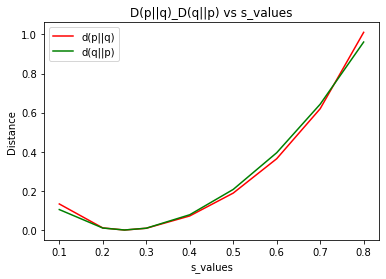

In [500]:
r=0.25
p_pmf=CreateBernoullipmf(r)
s_values=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8]
d1=list()
d2=list()
for i in s_values:
  q_pmf=CreateBernoullipmf(i)
  d1.append(CalculateKLDivergence(p_pmf,q_pmf))
  d2.append(CalculateKLDivergence(q_pmf,p_pmf))
print(d1)
print(d2)  
plt.plot(s_values,d1,color='r',label='d(p||q)')  
plt.plot(s_values,d2,color='g',label='d(q||p)')  
plt.title("D(p||q)_D(q||p) vs s_values")
plt.xlabel("s_values")
plt.ylabel("Distance")
plt.legend(loc='best')
plt.show()


As in the graph we can see that d(p||q) and d(q||p) are positive
d(p||q)=d(q||p)=0 when r=s in this case 0.25 otherwise they are not equal.

## 7b

In [501]:
def FindHistogramForFirstChannel(image_data,h,w):
  hist_dic={}
  hist_dic=InitializeDictForGrayScale()
  for i in range(w):
    for j in range(h):
      pixel_value=image_data[i][j]
      hist_dic[pixel_value]=hist_dic[pixel_value]+1
  return hist_dic 

In [502]:
rightimage,rightImgData=ReadImage('left.png')
h,w=rightimage.size
leftimage,leftImgData=ReadImage('right.png')

l_hist=FindHistogramForFirstChannel(leftImgData,h,w)
p_norm_hist=NormalizeHistogram(l_hist.copy(),h*w)

r_hist=FindHistogramForFirstChannel(rightImgData,h,w)
q_norm_hist=NormalizeHistogram(r_hist.copy(),h*w)

## 7c

In [503]:
d_KL=CalculateKLDivergence(p_norm_hist,q_norm_hist)
print("KL Divergence ="+str(d_KL))

KL Divergence =0.014409785833354487


In [504]:
d_KL=CalculateKLDivergence(q_norm_hist,p_norm_hist)
print("KL Divergence ="+str(d_KL))

KL Divergence =0.015104015237387051


Since the images are very similar and KL divergence distance amongst them is very less and close enough hence it can be used as a similarity metric for finding similarity among images